# Business Understanding
#### From the data provided, I would like to extract some conclusions that would help people in the Seattle area to better utilize property with Airbnb. If a user would like to invest in property in order to rent it out with Airbnb, how can the data could help him  understand how to set the highest price? How can he judge if an investment in property in a specific area could be profitable based on potential earnings he coud acquire? 

# Data Understanding
#### Based on the data that Airbnb has provided to Udacity students I will attempt to answer the following question:                            1) What are the characteristics of a home that influence its price most and what is the importance of each characteristic.                      2) What is the average price of a home based on the amount of people it can accommodate?                                                                       3) What are the top 10 neighbourhoods in regards with the mean price a home can have?

# 1. Prepare Data
#### In this section data must be assessed and cleaned before their analysis and modeling begins.

## 1.1 Assess Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

df_listings = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [2]:
# Get a view of the dataset
df_calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
# Get a view of the dataset
df_reviews.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
# Get info of main dataframe
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

#### After carefully looking at each column (this has not been added to the notebook for space reasons), I decided to drop the columns that are not relevant with the price of the home. Furthermore, some other actions are required and are listed below:
#### 1) Drop irrelevant to price columns
#### 2) Drop rows where entries for the neighbourhood column are missing.
#### 3) Drop columnn 'square_feet'
#### 4) Remove "%" from "host_response_rate" , convert it to intiger dtype and fill NaN with average
#### 5) Convert "bedrooms" to int dtype and fill NaN with mode.
#### 6) Fillna with mean to columns = 'host_total_listings_count','review_score_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','bathrooms','beds'.
#### 7) Remove whitespace from 'host_response_time' and fillna with mode to columns = 'host_response_time','host_is_superhost','host_identity_verified','property_type'
#### 8) Remove "dollar sign" from "extra_people" and convert it to float dtype
#### 9) Convert columns 'host_is_superhost','host_identity_verified','is_location_exact','instant_bookable' to boolean
#### 10) Remove "},{.'" from the "amenities" column, create a list with the elements of the original string and        'binarize' them so that each element forms a column where 1 describes a home that includes the service and ) if not.
#### 11) Remove dollar sign from 'price' and convert it to float 
#### 12) Create dummies for the remaining 'object' columns

## 1.2 Clean Data

#### 1.2.1 - Drop irrelevant to price columns and check that the change has been applied

In [5]:
# Create a copy of the original dataframe 
df_drop = df_listings.copy()

# Create list with columns that are irrelevantt to price to drop them
columns_to_drop = ['host_since','cleaning_fee','security_deposit','city','state','id','listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered','neighborhood_overview','notes','transit','thumbnail_url',
                  'medium_url','picture_url','xl_picture_url','host_id','host_url','host_name','host_location','host_about',
                  'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count',
                  'host_verifications','host_has_profile_pic','street','neighbourhood_cleansed','neighbourhood_group_cleansed',
                  'zipcode','market','smart_location','country_code','country','latitude','longitude','weekly_price','monthly_price',
                  'calendar_updated','has_availability','calendar_last_scraped','first_review','last_review','requires_license',
                  'license','jurisdiction_names','require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count']

# Drop columns
df_drop = df_drop.drop(columns_to_drop, axis = 1)
# Check that columns have been dropped
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 36 columns):
host_response_time             3295 non-null object
host_response_rate             3295 non-null object
host_is_superhost              3816 non-null object
host_total_listings_count      3816 non-null float64
host_identity_verified         3816 non-null object
neighbourhood                  3402 non-null object
is_location_exact              3818 non-null object
property_type                  3817 non-null object
room_type                      3818 non-null object
accommodates                   3818 non-null int64
bathrooms                      3802 non-null float64
bedrooms                       3812 non-null float64
beds                           3817 non-null float64
bed_type                       3818 non-null object
amenities                      3818 non-null object
square_feet                    97 non-null float64
price                          3818 non-null object
guests_

#### 1.2.2 Drop rows where entries for the neighbourhood column are missing

In [6]:
df_drop.dropna(axis=0, how='any', subset=['neighbourhood'], inplace=True)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3817
Data columns (total 36 columns):
host_response_time             2934 non-null object
host_response_rate             2934 non-null object
host_is_superhost              3400 non-null object
host_total_listings_count      3400 non-null float64
host_identity_verified         3400 non-null object
neighbourhood                  3402 non-null object
is_location_exact              3402 non-null object
property_type                  3401 non-null object
room_type                      3402 non-null object
accommodates                   3402 non-null int64
bathrooms                      3386 non-null float64
bedrooms                       3396 non-null float64
beds                           3401 non-null float64
bed_type                       3402 non-null object
amenities                      3402 non-null object
square_feet                    94 non-null float64
price                          3402 non-null object
guests_

#### 1.2.3 Drop column 'square_feet'

In [7]:
df_drop.drop(columns='square_feet',inplace=True)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3817
Data columns (total 35 columns):
host_response_time             2934 non-null object
host_response_rate             2934 non-null object
host_is_superhost              3400 non-null object
host_total_listings_count      3400 non-null float64
host_identity_verified         3400 non-null object
neighbourhood                  3402 non-null object
is_location_exact              3402 non-null object
property_type                  3401 non-null object
room_type                      3402 non-null object
accommodates                   3402 non-null int64
bathrooms                      3386 non-null float64
bedrooms                       3396 non-null float64
beds                           3401 non-null float64
bed_type                       3402 non-null object
amenities                      3402 non-null object
price                          3402 non-null object
guests_included                3402 non-null int64
extra_p

In [8]:
# Check which columns have NaN values 
df_drop.columns[df_drop.isna().any()].tolist()

['host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'host_identity_verified',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

#### 1.2.4 Convert 'host_response_rate" to int, remove '%' and fill NaN with average

In [9]:
df_drop.host_response_rate = df_drop.host_response_rate.str.replace('%', '')
df_drop.host_response_rate = df_drop.host_response_rate.fillna(df_drop.bedrooms.mean())
df_drop.host_response_rate = df_drop.host_response_rate.astype(int)
print(df_drop.host_response_rate.dtype)
print(df_drop.host_response_rate.shape)

int32
(3402,)


#### 1.2.5 Convert "bedrooms" to int dtype and fill NaN with mode

In [10]:
df_drop.bedrooms = df_drop.bedrooms.fillna(df_drop.bedrooms.mean())
df_drop.bedrooms = df_drop.bedrooms.astype(int)
print(df_drop.bedrooms.dtype)
print(df_drop.bedrooms.shape)

int32
(3402,)


#### 1.2.6 Fillna to columns 'host_total_listings_count','review_score_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month' with mean.

In [11]:
cols_fillna_mean = ['host_total_listings_count','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                    'reviews_per_month','bathrooms','beds']
for col in cols_fillna_mean:
        df_drop[col].fillna((df_drop[col].mean()), inplace=True)
        
df_drop.info()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3817
Data columns (total 35 columns):
host_response_time             2934 non-null object
host_response_rate             3402 non-null int32
host_is_superhost              3400 non-null object
host_total_listings_count      3402 non-null float64
host_identity_verified         3400 non-null object
neighbourhood                  3402 non-null object
is_location_exact              3402 non-null object
property_type                  3401 non-null object
room_type                      3402 non-null object
accommodates                   3402 non-null int64
bathrooms                      3402 non-null float64
bedrooms                       3402 non-null int32
beds                           3402 non-null float64
bed_type                       3402 non-null object
amenities                      3402 non-null object
price                          3402 non-null object
guests_included                3402 non-null int64
extra_peop

#### 1.2.7 Remove whitespace from 'host_response_time' and fillna to columns = 'host_response_time','host_is_superhost','host_identity_verified','property_type','bathrooms','beds' with mode.

In [12]:
# Remove whitespace from 'host_response_time' 
df_drop.host_response_time = df_drop.host_response_time.str.strip()
# Check that change has been applied
df_drop.host_response_time.value_counts()

within an hour        1505
within a few hours     875
within a day           526
a few days or more      28
Name: host_response_time, dtype: int64

In [13]:
# Fill NaN values to columns with mode()
cols_fillna_mode = ['host_response_time','host_is_superhost','host_identity_verified','property_type']
for col in cols_fillna_mode:
        df_drop[col].fillna((df_drop[col].mode()[0]), inplace=True)
        
df_drop.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3817
Data columns (total 35 columns):
host_response_time             3402 non-null object
host_response_rate             3402 non-null int32
host_is_superhost              3402 non-null object
host_total_listings_count      3402 non-null float64
host_identity_verified         3402 non-null object
neighbourhood                  3402 non-null object
is_location_exact              3402 non-null object
property_type                  3402 non-null object
room_type                      3402 non-null object
accommodates                   3402 non-null int64
bathrooms                      3402 non-null float64
bedrooms                       3402 non-null int32
beds                           3402 non-null float64
bed_type                       3402 non-null object
amenities                      3402 non-null object
price                          3402 non-null object
guests_included                3402 non-null int64
extra_peop

#### 1.2.8 Remove "dollar sign" from "extra_people" and convert it to float dtype

In [14]:
# Remove $ sign and convert to float
df_drop['extra_people'] = df_drop['extra_people'].str.replace('$', '')
df_drop['extra_people'] = df_drop['extra_people'].astype('float')


#### 1.2.8 Convert columns 'host_is_superhost','host_identity_verified','is_location_exact','instant_bookable' to boolean

In [15]:
# Convert columns to boolean
cols_bool = ['host_is_superhost','host_identity_verified','is_location_exact','instant_bookable']
for col in cols_bool:
    df_drop[col] = df_drop[col].str.replace('t', '1')
    df_drop[col] = df_drop[col].str.replace('f', '0')
for col in cols_bool:
    df_drop[col] = df_drop[col].astype('int')
  
    
# Check if change has been applied
df_drop.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3817
Data columns (total 35 columns):
host_response_time             3402 non-null object
host_response_rate             3402 non-null int32
host_is_superhost              3402 non-null int32
host_total_listings_count      3402 non-null float64
host_identity_verified         3402 non-null int32
neighbourhood                  3402 non-null object
is_location_exact              3402 non-null int32
property_type                  3402 non-null object
room_type                      3402 non-null object
accommodates                   3402 non-null int64
bathrooms                      3402 non-null float64
bedrooms                       3402 non-null int32
beds                           3402 non-null float64
bed_type                       3402 non-null object
amenities                      3402 non-null object
price                          3402 non-null object
guests_included                3402 non-null int64
extra_people 

#### 1.2.9 Deal with the 'amenities' column as described in the "Assess Data" section

In [16]:
# Put values for 'amenities' into a list
df_drop['amenities'] = df_drop['amenities'].str.replace('{', '')
df_drop['amenities'] = df_drop['amenities'].str.replace('}', '')
df_drop['amenities'] = df_drop['amenities'].str.replace('"', '')

# Reset the index to iterate over the rows
df_drop.reset_index(drop=True,inplace=True)

# Iterate over the rows to create a list under the amenities values
for row in range(0,df_drop.shape[0]):
    df_drop.amenities[row] = df_drop.amenities[row].split(",")

# Checck that change has been applied
df_drop.amenities

C:\Users\Fotis\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0       [TV, Cable TV, Internet, Wireless Internet, Ai...
1       [TV, Internet, Wireless Internet, Kitchen, Fre...
2       [TV, Cable TV, Internet, Wireless Internet, Ai...
3       [Internet, Wireless Internet, Kitchen, Indoor ...
4       [TV, Cable TV, Internet, Wireless Internet, Ki...
                              ...                        
3397    [TV, Cable TV, Internet, Wireless Internet, Ai...
3398    [Internet, Wireless Internet, Kitchen, Free Pa...
3399    [TV, Cable TV, Internet, Wireless Internet, Ai...
3400    [TV, Cable TV, Internet, Wireless Internet, Ki...
3401    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, Length: 3402, dtype: object

In [17]:
# Binarize each element of the list under the 'amenities' values
mlb = MultiLabelBinarizer()
df_drop = df_drop.join(pd.DataFrame(mlb.fit_transform(df_drop.pop('amenities')),
                          columns=mlb.classes_,
                          index=df_drop.index))

# Check that change has benn applied
print(df_drop.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 76 columns):
host_response_time             3402 non-null object
host_response_rate             3402 non-null int32
host_is_superhost              3402 non-null int32
host_total_listings_count      3402 non-null float64
host_identity_verified         3402 non-null int32
neighbourhood                  3402 non-null object
is_location_exact              3402 non-null int32
property_type                  3402 non-null object
room_type                      3402 non-null object
accommodates                   3402 non-null int64
bathrooms                      3402 non-null float64
bedrooms                       3402 non-null int32
beds                           3402 non-null float64
bed_type                       3402 non-null object
price                          3402 non-null object
guests_included                3402 non-null int64
extra_people                   3402 non-null float64
minimum_nigh

#### 1.2.10 Remove dollar sign from 'price' and convert it to float

In [18]:
# Remove $ sign and convert to float
df_drop['price'] = df_drop['price'].str.replace('$', '')
df_drop['price'] = df_drop['price'].str.replace(',', '')
df_drop['price'] = df_drop['price'].astype('float') 
df_drop.price.dtype

dtype('float64')

#### 1.2.11 Create dummy variables for the remaining categorical features

In [19]:
# Copy the dataframe before the dummy variables
df_new = df_drop.copy()
# Dummy the categorical variables
cat_vars = df_drop.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_drop = pd.concat([df_drop.drop(var, axis=1), pd.get_dummies(df_drop[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
# Check that change has been applied
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Columns: 176 entries, host_response_rate to cancellation_policy_strict
dtypes: float64(13), int32(48), int64(9), uint8(106)
memory usage: 1.5 MB


In [20]:
# Check dataframe that will be fed to the model
df_drop.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,96,0,3.0,1,1,4,1.0,1,1.0,85.0,...,0,0,0,0,0,0,0,1,1,0
1,98,1,6.0,1,1,4,1.0,1,1.0,150.0,...,0,0,0,0,0,0,0,1,0,1
2,67,0,2.0,1,1,11,4.5,5,7.0,975.0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,1.0,1,1,3,1.0,0,2.0,100.0,...,0,0,0,0,0,0,0,1,0,0
4,100,0,2.0,1,1,6,2.0,3,3.0,450.0,...,0,0,0,0,0,0,0,1,0,1


## 1.3 Analyze and model Data

### 1.3.1 What are the characteristics of a home that influence the price most and what is the importance of these characteristics?

#### 1.3.1a Select the 15 most important features that influence price

C:\Users\Fotis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.61839742e-02 1.00369497e-02 2.14264459e-02 1.22977633e-02
 1.66575994e-03 2.18429476e-02 1.36082183e-02 1.62620866e-02
 1.77686511e-02 1.77272015e-02 1.94169957e-02 2.03865765e-02
 1.91097816e-02 2.36139239e-02 2.40316958e-02 2.56158686e-02
 2.71922564e-02 2.77078550e-02 2.49308398e-02 1.52306051e-02
 1.65848758e-02 1.26619300e-02 1.21926803e-02 1.83149596e-02
 1.88145613e-02 8.92710901e-03 2.91512330e-02 4.07939502e-04
 7.61554987e-03 1.03149835e-02 5.31922408e-03 6.72712830e-03
 1.15676051e-02 1.36952208e-02 6.85258662e-03 7.71525530e-03
 2.27010779e-03 8.64008702e-03 5.71276632e-03 8.95171743e-03
 1.34260311e-02 1.39019732e-02 1.51654461e-02 1.49515947e-02
 4.62044762e-03 6.36727211e-03 7.80268392e-03 3.08762063e-03
 5.34519263e-03 1.16980565e-02 1.09468332e-02 7.10592576e-03
 5.98562547e-03 7.64361152e-03 2.26742039e-03 1.30051376e-03
 7.89488723e-03 9.51087053e-03 1.74467397e-03 1.12973870e-02
 1.32055581e-02 7.68037672e-03 1.82114640e-03 4.05849403e-03
 1.32287441e-02 9.497352

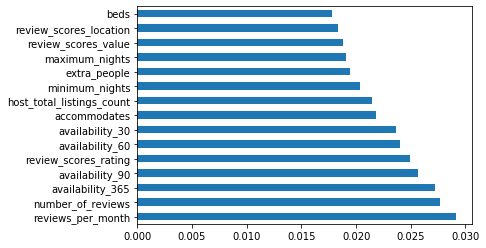

In [21]:
X = df_drop.loc[:, df_drop.columns != 'price'];
y = df_drop.price;

model = ExtraTreesClassifier();
model.fit(X,y);
print(model.feature_importances_); #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns);
feat_importances.nlargest(15).plot(kind='barh');



#### 1.3.1b Build and fit a model that predicts price based on the important features from above and evaluate with the metric r2_score


In [22]:
feats = feat_importances.nlargest(15).index

X_2 = df_drop[feats]
y_2 = df_drop['price']

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_2_train, y_2_train)

y_test_preds = lm_model.predict(X_2_test)# Predictions here
r2_test = r2_score(y_2_test, y_test_preds) # Rsquared here

# Print r2 to see result
r2_test


0.5106087340988894

#### 1.3.1c Get coefficient for each feature

In [23]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_2_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_2_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_2_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
7,accommodates,24.798453,24.798453
13,review_scores_location,18.226679,18.226679
12,review_scores_value,-13.307598,13.307598
14,beds,6.210793,6.210793
0,reviews_per_month,-6.008563,6.008563
4,review_scores_rating,1.822371,1.822371
10,extra_people,0.220572,0.220572
5,availability_60,0.212610,0.212610
3,availability_90,-0.169479,0.169479
8,host_total_listings_count,0.040101,0.040101


### 1.3.2 What is the average price of a home based on the number of people it can accomodate?

In [24]:
# First, I split the nr. of people a property can accommodate in bins
df_new['acc_bins'] = pd.cut(x=df_new['accommodates'], bins=[0, 4, 8, 16])
df_new.acc_bins.value_counts()

(0, 4]     2709
(4, 8]      631
(8, 16]      62
Name: acc_bins, dtype: int64

In [25]:
df_acc = df_new.groupby(['acc_bins'],as_index=False).price.mean()
df_acc

,acc_bins,price
0,"(0, 4]",104.524917
1,"(4, 8]",211.104596
2,"(8, 16]",378.338710


In [26]:
# Sort the order of nr. of people that a home can accommodate by descending price
price_means = df_acc.groupby('acc_bins').mean()
acc_order = price_means.sort_values('price', ascending = False).index
acc_order

CategoricalIndex([(8, 16], (4, 8], (0, 4]], categories=[(0, 4], (4, 8], (8, 16]], ordered=True, name='acc_bins', dtype='category')

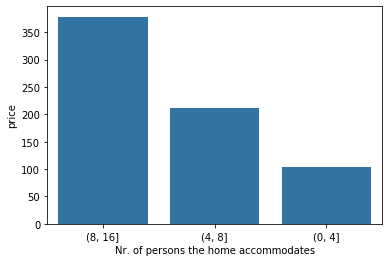

In [28]:
base_color = sb.color_palette()[0]
sb.barplot(data = df_acc, x = 'acc_bins', y = 'price',
color = base_color, order = acc_order, ci = 'sd');
plt.xlabel('Nr. of persons the home accommodates');

### 1.3.3 What are the top 10 neighbourhoods in regards with the mean price a home can have?

In [43]:
# Create a dataframe that displays the top 10 neighbourhoods in regards with the max average price a home can have
df_neigh = df_new.groupby(['neighbourhood'],as_index=False).price.mean().sort_values('price', ascending = False)[:10]
df_neigh

,neighbourhood,price
17,Fairmount Park,370.000000
31,Industrial District,245.000000
58,Portage Bay,241.428571
78,Westlake,197.000000
0,Alki,196.652174
45,Montlake,195.947368
40,Magnolia,176.000000
55,Pike Place Market,175.512821
79,Windermere,174.700000
59,Queen Anne,168.764706


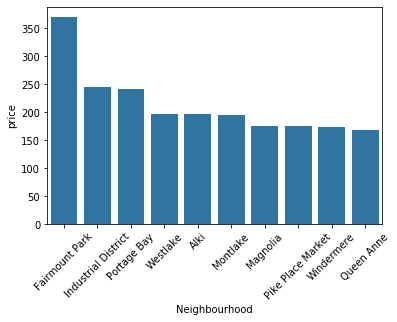

In [49]:
# Create barchart that shows the average price of the top 10 neighbourhoods
g = sb.barplot(data = df_neigh, x = 'neighbourhood', y = 'price',color = base_color, ci = 'sd');
plt.xlabel('Neighbourhood');
plt.xticks(rotation=45);